1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

[-0.08984202  0.7126564 ]
function value is: -1.031628453489877

 [ 0.08984201 -0.71265641]
function value is: -1.031628453489877

 [0. 0.]
function value is: 0.0
This is not a proper initial points


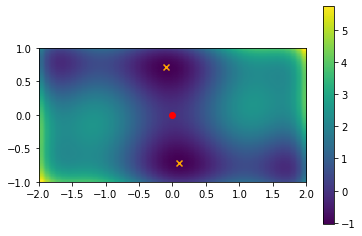

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline
def f(x):
    return (4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)
plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1],origin='lower')
plt.colorbar()

#global
lower = np.random.uniform(-2, 2, 100)
upper = np.random.uniform(0, 1, 100)
solutions = [optimize.minimize(f,(l, u)) for (l, u) in zip(lower, upper)]
idx = np.argmin([solution['fun'] for solution in solutions])
solution = solutions[idx]
print(solution.x)
print('function value is:',solution.fun)
plt.scatter(solution.x[0],solution.x[1],marker='x',color='orange')

# #global
lower2 = np.random.uniform(-2, 2, 100)
upper2 = np.random.uniform(-1, 0, 100)
solutions2 = [optimize.minimize(f,(l, u)) for (l, u) in zip(lower2, upper2)]
idx = np.argmin([solution['fun'] for solution in solutions2])
solution = solutions2[idx]
print('\n',solution.x)
print('function value is:',solution.fun)
plt.scatter(solution.x[0],solution.x[1],marker='x',color='orange')


solutionf = optimize.minimize(f,(0,0))
print('\n',solutionf.x)
print('function value is:',solutionf.fun)
plt.scatter(solutionf.x[0],solutionf.x[1],color='r')
print('This is not a proper initial points')
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

parameters:
 [23.09208553  6.73581628 -2.29443549 15.77932116]
covariance matrix:
 [[ 1.32861844e+00 -1.60402174e-03 -1.01471459e-01 -1.08333646e+00]
 [-1.60402174e-03  6.31511812e-03  2.12206483e-04  1.91623521e-03]
 [-1.01471459e-01  2.12206483e-04  2.75428324e-02  1.70924975e-01]
 [-1.08333646e+00  1.91623521e-03  1.70924975e-01  1.38425163e+00]]
A = 23.09 +- 1.15
B = 6.74 +- 0.08
C = -2.29 +- 0.17
D = 15.78 +- 1.18
911 µs ± 55.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


parameters:
 [ 52.64929254   7.16452587   1.97590025 -61.32093781]
covariance matrix:
 [[ 1.96936926e+00 -8.73534275e-04  2.27193687e-02 -1.05131594e+00]
 [-8.73534275e-04  2.22850491e-03 -4.92570234e-05  1.09105400e-03]
 [ 2.27193687e-02 -4.92570234e-05  5.77332382e-03 -7.06528140e-02]
 [-1.05131594e+00  1.09105400e-03 -7.06528140e-02  1.41332241e+00]]
A = 52.65 +- 1.40
B = 7.16 +- 0.05
C = 1.98 +- 0.08
D = -61.32 +- 1.19
450 µs ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


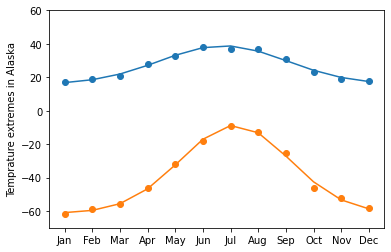

In [2]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
T_max=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
T_min=[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
plt.scatter(months,T_max)
plt.scatter(months,T_min)
plt.ylim([-70, 60])
plt.ylabel('Temprature extremes in Alaska')
def f(x,a,b,c,d):
    return a*np.exp((-(x-b)**2)/(2*c**2))+d
x=np.array(range(1,13))
popt, pcov = optimize.curve_fit(f,x, T_max,  p0=[20,7, 12,0], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("B = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("C = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("D = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))
plt.plot(months, f(x, popt[0], popt[1],popt[2],popt[3]))
%timeit optimize.curve_fit(f,x, T_max,  p0=[20,7, 12,0], full_output=False)
print('\n')
popt, pcov = optimize.curve_fit(f,x, T_min,  p0=[50,7, 2,-70], full_output=False )
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("B = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("C = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("D = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))
plt.plot(months, f(x, popt[0], popt[1],popt[2],popt[3]))
%timeit optimize.curve_fit(f,x, T_min,  p0=[50,7, 2,-70], full_output=False )

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [3]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-01-07 21:04:36--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-07 21:04:42--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc41770517d03f38d921a7c1001f.dl.dropboxusercontent.com/cd/0/inline/BdV1kW0raCeplG8lIPEtVpl6gYeD972Ke9FCq0MaY2xRnzH0tfgpBKEjF-RoAuq9CzejeW5cYfcNeBK3889W23QDyxVU6CN4F6ybN-zBZHo8YXFpbRLKUqlXi5KJ5UeRynC16lZbD9b-AG-997l3nU3K/file# [following]
--2022-01-07 21:04:43--  https://uc41770517d03f38d921a7c1001f.dl.dropboxusercontent.com/cd/0/inline/BdV1kW0raCeplG8lIPEtVpl6gYeD972Ke9FCq0MaY2xRnzH0tfgpBKEjF-RoAuq9CzejeW5c

parameters:
 [ 2.68173111e+03 -8.38416752e-02  2.36180576e-01]
covariance matrix:
 [[ 1.36073136e+02  2.21555030e-08 -7.98940538e-03]
 [ 2.21555030e-08  1.40726877e-06 -3.65355551e-12]
 [-7.98940538e-03 -3.65355551e-12  1.40727016e-06]]
A = 2681.73 +- 11.67
B = -0.08 +- 0.00
C = 0.24 +- 0.00


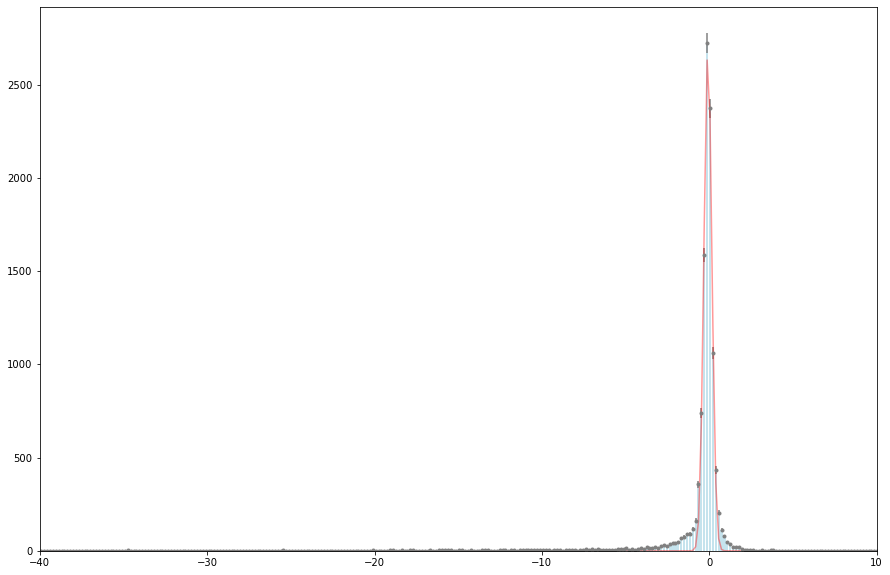

In [3]:
import pickle
import matplotlib.pyplot as plt

with open('data/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)
a=data.tolist()
plt.figure(figsize=(15, 10))
bins=1000
plt.hist( a['residuals'],bins=bins,color='lightblue',alpha=0.7,rwidth=0.75)
hist, rang =  np.histogram( a['residuals'], bins = bins)
mid = (rang[:-1] + rang[1:]) / 2
binwidth=mid[1]-mid[0]
plt.errorbar(mid,hist,np.sqrt(hist), fmt=".",color="gray")
plt.xlim(-40,10)

def f(x,a,b,c):
    return a*np.exp((-(x-b)**2)/(2*c**2))
#x=np.array(range(len( a['residuals'])))
popt, pcov = optimize.curve_fit(f,mid,  hist,  p0=[3000,0, 6], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("B = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("C = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
#print("D = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))
plt.plot(mid, f(mid,popt[0],popt[1],popt[2]),alpha=0.4,color='r')
#plt.xlim(-160,10)
plt.show()


In [5]:
from scipy import stats

#p = np.arange(0, 30, 0.1)
ndof = len(mid) - 1
x=np.array(range(len(a['residuals'])))
print("n degrees of freedom =", ndof)
# calculate the chi^2
y_sigma=np.sqrt(hist)
l=(hist - f(mid, popt[0], popt[1],popt[2]))**2
chi2=0
for i in range(len(y_sigma)):
    if y_sigma[i]!=0:
        chi2+=l[i]/y_sigma[i]
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)
print("\nit is not a good fit!!!")


n degrees of freedom = 999
chi2 = 16228.65923490912
p-value = 0.0

it is not a good fit!!!


## 4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [46]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2022-01-09 17:55:50--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2022-01-09 17:56:02--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc754dc4b82a11fae2b9397e8137.dl.dropboxusercontent.com/cd/0/inline/BdfbiJ0YDvHrFagthqAup8Vzu1bAV9LmrmZvYyT4jDT21lqfx5CJuAiqrWIIDv-sXyPwPhDkDRxmA_hpgpUtCH3xjzid88wucbQeZhJClw9gL7ZDoSp5BMnDk4iLyilaByvTHVZ3mKBvuSBqygZHwsPI/file# [following]
--2022-01-09 17:56:03--  https://uc754dc4b82a11fae2b9397e8137.dl.dropboxusercontent.com/

parameters:
 [-9.98813369 -0.23334761  9.38411486]
covariance matrix:
 [[ 3.22599216e-02 -1.58648811e-07 -5.53309985e-08]
 [-1.58648811e-07  3.23579125e-04 -2.22857598e-08]
 [-5.53309985e-08 -2.22857598e-08  1.61303440e-02]]
A = -9.99 +- 0.18
B = -0.23 +- 0.02
C = 9.38 +- 0.13


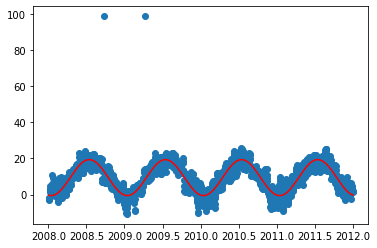

34359.85859996653
overall average: 9.38409773497604
coldest day calculate by min of f(t): -0.6040188274655485
hotest day calculate by max of f(t): 19.372248550661904

b parameter move function along x axis, here it shows the time of the seasons or hotest and coldest days changes.


In [6]:
import pandas as pd

file_name='munich_temperatures_average_with_bad_data.txt'
f = open(file_name, "r")
a=[]
b=[]

for x in f:
    a.append((float(x.split( )[0])))
    b.append((float(x.split( )[1])))

    
d={'Time':a,'Temp':b}
df1=pd.DataFrame(d, columns=['Time','Temp'])  

df=df1[df1['Time']<2012]
df=df[df['Time']>2008]

plt.scatter(df['Time'], df['Temp'])
def f(x,a,b,c):
    return a*np.cos(2*np.pi*x+b)+c
#x=np.array(range(len( a['residuals'])))
popt, pcov = optimize.curve_fit(f,df['Time'],  df['Temp'],  p0=[25,0, 0], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("B = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("C = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
plt.plot(df['Time'],f(df['Time'],popt[0],popt[1],popt[2]),color='r')
plt.show()
ssr_1=np.sum((df['Temp'] - f(df['Time'],popt[0],popt[1],popt[2]))**2)
print(ssr_1)
ndof_1=3-1

print('overall average:',df['Temp'].mean())

def f(x):
    return popt[0]*np.cos(2*np.pi*x+popt[1])+popt[2]
print('coldest day calculate by min of f(t):' ,optimize.minimize_scalar(f)['fun'])
def g(x):
    return -f(x)
opt=optimize.minimize_scalar(g)['fun']
print('hotest day calculate by max of f(t):' ,-opt)
print('\nb parameter move function along x axis, here it shows the time of the seasons or hotest and coldest days changes.')

parameters:
 [ -9.98221636   1.00144378 -18.46760313   9.39812225]
covariance matrix:
 [[ 3.25939196e-02 -4.83549010e-05  6.10697238e-01 -5.13338874e-04]
 [-4.83549009e-05  6.49660395e-06 -8.20484693e-02  6.28910741e-05]
 [ 6.10697236e-01 -8.20484693e-02  1.03622654e+03 -7.94277996e-01]
 [-5.13338873e-04  6.28910741e-05 -7.94277996e-01  1.67469868e-02]]
A = -9.98 +- 0.18
B = 1.00 +- 0.00
C = -18.47 +- 32.19
D = 9.40 +- 0.13


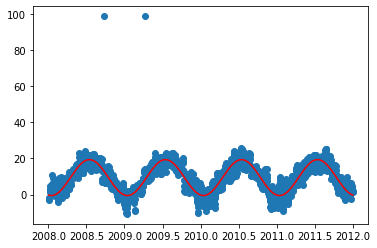

34352.79405444597


In [7]:
plt.scatter(df['Time'], df['Temp'])
def g(x,a,b,c,d):
    return a*np.cos(2*np.pi*b*x+c)+d
#x=np.array(range(len( a['residuals'])))
popt, pcov = optimize.curve_fit(g,df['Time'],  df['Temp'],  p0=[25,1,0, 0], full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("B = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("C = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print("D = %.2f +- %.2f" % (popt[3], np.sqrt(pcov[3,3])))

plt.plot(df['Time'],g(df['Time'],popt[0],popt[1],popt[2],popt[3]),color='r')
plt.show()
ssr_2=np.sum((df['Temp'] - g(df['Time'],popt[0],popt[1],popt[2],popt[3]))**2)
print(ssr_2)
ndof_2=4-1

In [8]:
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
cl_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, len(df['Time']), verbose=True)


CL: 0.584 , additional parameter necessary: NO
